# Background Energy

Firstly, the background energy for a flat universe was modelled for a matter only, vacuum energy only and ΛCDM case (Einstein-de Sitter, de Sitter and concordance model respectively). This was done by evolving the Friedmann equation discretely as described. These theoretical results were compared to the analytical expansion. The errors were then found by calculating the difference between these methods at each time-step. These computations were conducted using a time-step of ∆t = 0.001Gyr and a system run for 20,000 iterations.

## Configure Python settings

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

## Models

Set up parameters to model the Universe according to the Friedmann equation: H<sub>0</sub> =  8πG/3 ρ + Λc<sup>2</sup>/3

There are three main models to be explored:

| Model             | omega_m | omega_lambda  | a |
| :---------------: |:-------:| :------------:|:-----:|
| Einstein DeSitter | 1       | 0             | a ∝ t<sup>2/3</sup> |
| DeSitter          | 0       | 1             | a ∝ exp(t) |
| Concordence       | 0.3     | 0.7           | a ∝ sinh<sup>2/3</sup>(t) |

## Set up parameters 

In [14]:
# Currently set up for a concordence model

omega_m, omega_phi =  0.3, 0.7
a0, H0, t0 = 0.15, 1./13.7, 1.
dt, iterations = 0.001, 20000
avals, Hvals, t = [], [], []

t = np.arange(t0, t0 + iterations*dt, dt)

## Define functions to model theories

In [15]:
def Hubble(ai):
       brack = (omega_m)*(math.pow(ai,-3)) + omega_phi
       H2 = (math.pow(H0, 2))*brack
       H = math.sqrt(H2)
       return H

In [16]:
def Theory():
      avals, Hvals, Hdot = [], [], []
      anext, H = a0, H0
      for i in range(len(t)):
          avals.append(anext)
          Hvals.append(H)
          H = Hubble(anext)
          anext = anext*(1 + H*dt)
      return avals, Hvals


In [17]:
    def EinDeSit():
        avals = []
        a_next = a0
        num = 2./3.
        for i in range(len(t)):
            avals.append(a_next)
            term = 3.*H0*(dt)/(2.)  + math.pow(a_next, 3./2.)
            a_next = math.pow(term, num)
        return avals

In [18]:
    def DeSit():
        avals = []
        a_next = a0
        for i in range(len(t)):
            avals.append(a_next)
            a_next = a_next*(1 + H0*dt + (H0*dt)**2/2.)
        return avals

In [19]:
 def concordence():
        avals = []
        a_next = a0
        coeff = math.pow(omega_m/omega_phi, 1./3.)
        for i in range(len(t)):
            avals.append(a_next)
            arg = 3.*math.sqrt(omega_phi)*H0/2.
            term2 = math.sinh(arg*t[i])
            a_next = coeff*(math.pow(term2, 2./3.))
        return avals

## Chose which theory to model

According to the earlier parameter set-ups

In [20]:
Theory = Theory()[0]

if omega_m == 1.0: model = EinDeSit()
elif omega_m == 0.0: model = DeSit()
else: model = concordence()

In [21]:
diff, difference = [], []

for i in range(len(Theory)):
    diff.append(abs(100*(Theory[i] - model[i])/Theory[i]))

## Plot the model 

The analytical model plots the computationally evolved and expanded model and the theoretical evolution maps

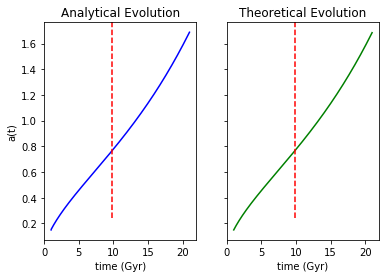

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey = True)
ax1.plot(t, model, 'b', label = 'Analytical Model')
ax1.set_title('Analytical Evolution')
ax2.plot(t, Theory, 'g', label = 'Computational Expasion')
ax2.set_title('Theoretical Evolution')
ax1.set_ylabel('a(t)')
ax1.set_xlabel('time (Gyr)')
ax1.axvline(x = 9.8, ymin = 0.1, color ='r', linestyle = '--')
ax2.axvline(x = 9.8, ymin = 0.1, color ='r', linestyle = '--')
ax2.set_xlabel('time (Gyr)')
plt.savefig('ConcModels.png')
plt.show()

## Plot the Compuational Error

Calculated as the difference between analytical and theoretical models

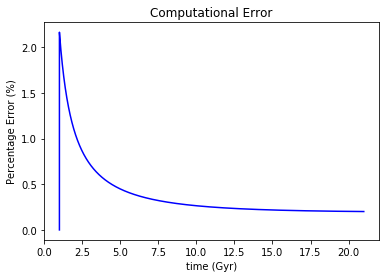

In [25]:
plt.plot(t, diff, 'b', label = 'Computational Error')
plt.title('Computational Error')
plt.ylabel('Percentage Error (%)')
plt.xlabel('time (Gyr)')
plt.savefig('ConcError.png')
plt.show()

f = open('../MinimizingEFT/error.txt', 'w')
for i in range(len(diff)):
    f.write(str(diff[i]) + '\n')